In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
#news_w_label = pd.read_csv("/kaggle/input/stocknews/Combined_News_DJIA.csv")
news_w_label = pd.read_csv("Datasets/Combined_News_DJIA.csv")
print(news_w_label.shape)
print(news_w_label.columns)
news_w_label.head(20)

(1989, 27)
Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
#djia = pd.read_csv("/kaggle/input/stocknews/upload_DJIA_table.csv")
djia = pd.read_csv("Datasets/upload_DJIA_table.csv")
print(djia.shape)
print(djia.columns)
djia.head(20)

(1989, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
7,2016-06-22,17832.669922,17920.160156,17770.359375,17780.830078,89440000,17780.830078
8,2016-06-21,17827.330078,17877.839844,17799.800781,17829.730469,85130000,17829.730469
9,2016-06-20,17736.869141,17946.359375,17736.869141,17804.869141,99380000,17804.869141


In [4]:
djia_merged = news_w_label.merge(djia, how='inner', on='Date') #Merge both datasets
djia_merged.head(20)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
5,2008-08-15,1,"b""Mom of missing gay man: Too bad he's not a 2...","b""Russia: U.S. Poland Missile Deal Won't Go 'U...","b""The government has been accused of creating ...",b'The Italian government has lashed out at an ...,b'Gorbachev: Georgia started conflict in S. Os...,"b""China fakes more than your girlfriend; 'Ethn...","b""The UN's criticism of freedom of expression ...",b'Russian general threatens nuclear strike on ...,...,"b'Hacker Kidnaps 

In [5]:
djia_merged.isnull().sum() #Find the number of null records

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        1
Top24        3
Top25        3
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
djia_merged[djia_merged['Top25'].isnull()] # Find the null records

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN,9626.419922,9713.709961,9580.929688,9683.410156,224030000,9683.410156
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN,10467.120117,10522.059570,10461.679688,10520.089844,52670000,10520.089844
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN,12453.620117,12506.059570,12447.559570,12505.990234,166630000,12505.990234


In [7]:
djia_merged.fillna("", inplace=True) # Set the NaN values as empty string
djia_merged.isnull().sum() # Check to see that the values have been replaced successfully

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        0
Top24        0
Top25        0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Different graphs the we are going to plot as part of the EDA phase
1. Plot on the histogram for close column - bin the data and then plot a histogram - Garima
2. Box Plot - Somya
3. Basic time-series model - Varsha
4. Moving average time-series model - n-days moving - we are going to work with 25-days and 50-days - Tejas 
5. Plot a histogram on the difference between opening and closing columns. Graph on the delta = (closing - opening) - Gayathri
6. Count of labels - Lamiae
7. Plotting golden cross and death cross - Varada

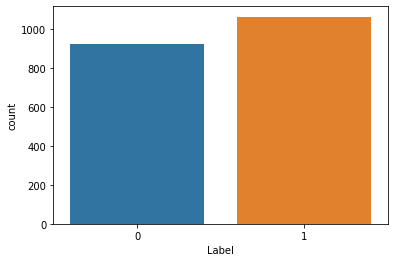

In [8]:
# Count of labels
sns.countplot(x='Label', data=djia_merged)
plt.show()

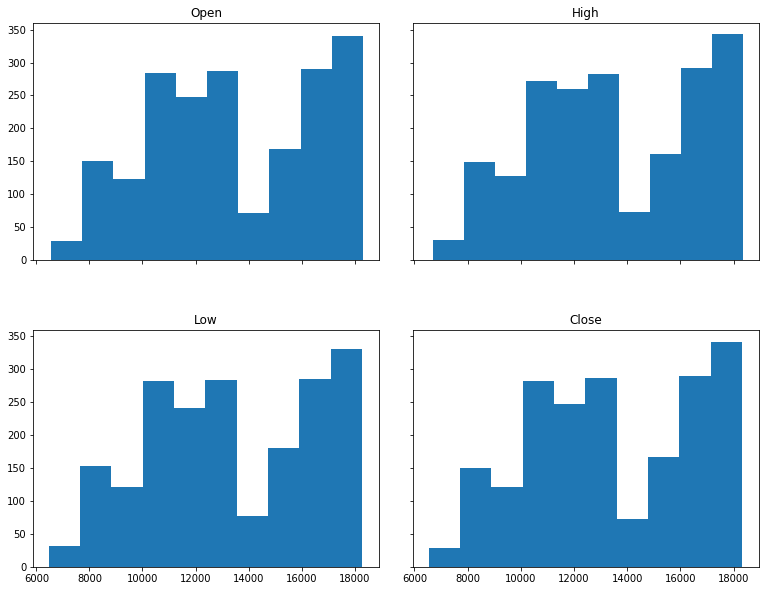

In [9]:
# Histpgrams for existing columns
cols = list(djia.columns[1:-2])
cnt = 0
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(13, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for i in range(2):
    for j in range(2):
        ax[i, j].hist(djia_merged[cols[cnt]])
        ax[i, j].set_title(cols[cnt])
        cnt += 1

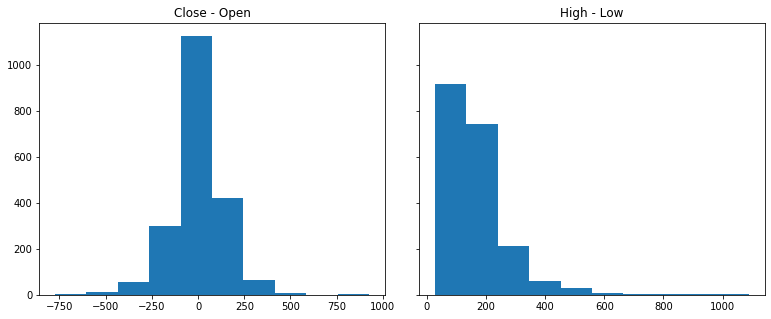

In [10]:
# Histograms for differences
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(13, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
ax[0].hist(djia_merged['Close']-djia_merged['Open'])
ax[0].set_title('Close - Open')
ax[1].hist(djia_merged['High']-djia_merged['Low'])
ax[1].set_title('High - Low')
plt.show()

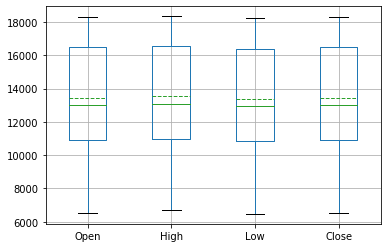

In [11]:
# Box plots for existing columns
cols = list(djia.columns[1:-2])
djia_merged.boxplot(cols, meanline=True, showmeans=True)
plt.show()

In [12]:
# Information about difference of closing price with the previous day's closing price
data = np.array(np.array(djia_merged['Close'][1:]) - np.array(djia_merged['Close'][:-1]))
df = pd.DataFrame(data)
interval_perc = 0.2
print(float(df.quantile(0.5-(interval_perc/2))), float(df.quantile(0.5+(interval_perc/2))))
df.describe()

-14.624218999999716 29.977734000000783


,0
count,1988.000000
mean,3.126282
std,143.366748
min,-777.679688
25%,-60.751221
50%,7.129882
75%,74.961914
max,936.419922


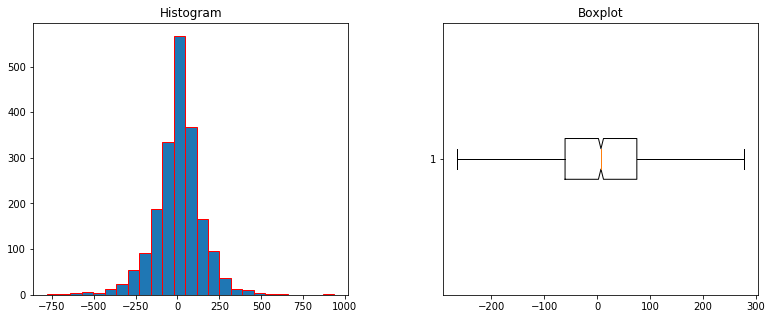

In [13]:
# Plots for difference of closing price with the previous day's closing price
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
ax[0].hist(data, bins = 25, edgecolor="red")
ax[0].set_title('Histogram')
ax[1].boxplot(data, notch=True, vert=False, showfliers=False)
ax[1].set_title('Boxplot')
plt.show()

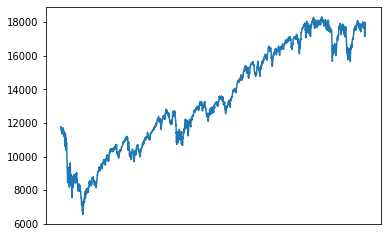

In [14]:
# Basic time series
plt.plot(djia_merged['Date'], djia_merged['Close'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [15]:
# Moving averages in time series
new_df = pd.DataFrame(djia_merged[['Date', 'Close']])
new_df['20_Day_MA'] = djia_merged['Close']
new_df['50_Day_MA'] = djia_merged['Close']
new_df['Signal'] = 0
for i in range(1, len(new_df['Date'])):
    if i < 20:
        rng = range(i)
        lth = i+1
    else:
        rng = range(i-20+1, i)
        lth = 20
    new_df['20_Day_MA'][i] = sum([new_df['Close'][j] for j in rng])/lth
for i in range(1, len(new_df.Date)):
    if i < 50:
        rng = range(i)
        lth = i+1
    else:
        rng = range(i-50+1, i)
        lth = 50
    new_df['50_Day_MA'][i] = sum([new_df['Close'][j] for j in rng])/lth
    if (new_df['20_Day_MA'][i] > new_df['50_Day_MA'][i]) and (new_df['20_Day_MA'][i-1] <= new_df['50_Day_MA'][i-1]):
        new_df['Signal'][i] = 1 #Buy
    elif (new_df['20_Day_MA'][i] < new_df['50_Day_MA'][i]) and (new_df['20_Day_MA'][i-1] >= new_df['50_Day_MA'][i-1]):
        new_df['Signal'][i] = -1 #Sell
new_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCo

,Date,Close,20_Day_MA,50_Day_MA,Signal
0,2008-08-08,11734.320312,11734.320312,11734.320312,0
1,2008-08-11,11782.349609,5867.160156,5867.160156,0
2,2008-08-12,11642.469727,7838.889974,7838.889974,0
3,2008-08-13,11532.959961,8789.784912,8789.784912,0
4,2008-08-14,11615.929688,9338.419922,9338.419922,0
...,...,...,...,...,...
1984,2016-06-27,17140.240234,16910.983008,17434.499844,0
1985,2016-06-28,17409.720703,16878.635059,17417.221445,0
1986,2016-06-29,17694.679688,16859.637598,17404.343867,0
1987,2016-06-30,17929.990234,16852.443555,17396.312070,0


In [16]:
new_df['Signal'].value_counts()

 0    1970
-1      10
 1       9
Name: Signal, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


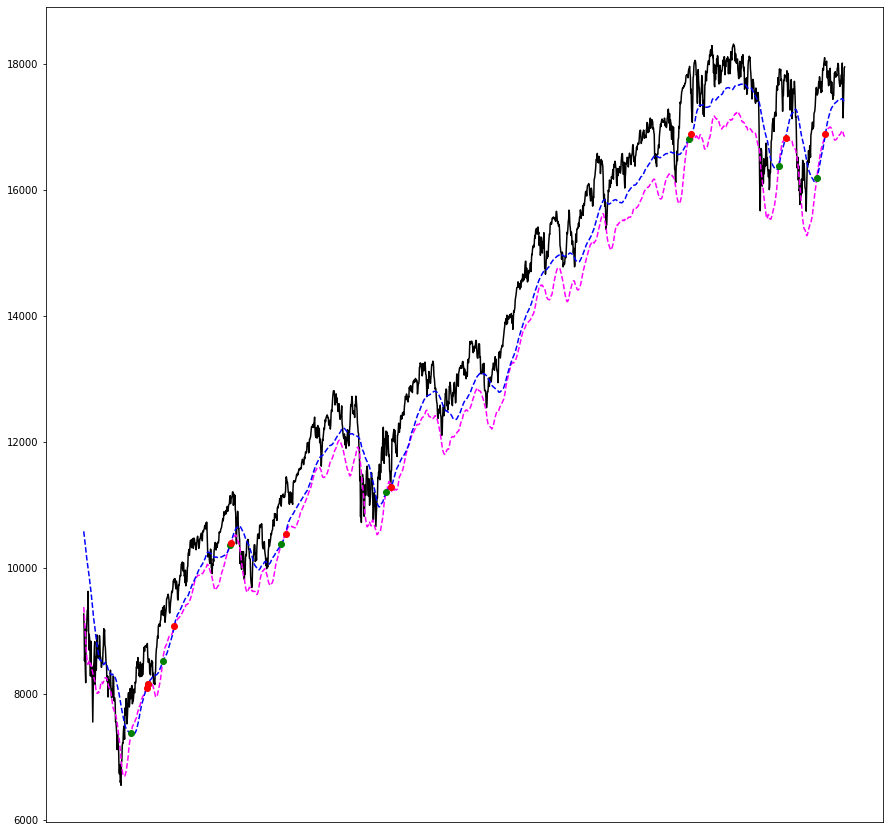

In [17]:
# Plotting MAs
fig = plt.figure(figsize=(15, 15))
plt.plot(new_df['Close'][50:], color="black")
plt.plot(new_df['20_Day_MA'][50:], color="magenta", linestyle='--')
plt.plot(new_df['50_Day_MA'][50:], color="blue", linestyle='--')
plt.plot(new_df[50:][new_df['Signal'] == 1]['20_Day_MA'], marker='o', color="green", linestyle='None')
plt.plot(new_df[50:][new_df['Signal'] == -1]['20_Day_MA'], marker='o', color="red", linestyle='None')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()